## 🔗 **Bipartite Graph**

A bipartite graph is a graph whose nodes can be divided into two disjoint sets such that no two nodes within the same set are adjacent.

🎯 **Applications**

- 🏭 **Manufacturing & Scheduling** – Assigning tasks to machines efficiently.  
- 💼 **Job Matching** – Matching applicants to jobs based on skills.  
- 🎥 **Recommendation Systems** – Modeling user-item interactions (e.g., movie recommendations).  
- 🚛 **Network Flow Problems** – Optimizing transportation and supply chain networks.  
- 🧬 **Biological Networks** – Representing interactions between proteins and genes.  
- 👥 **Social Network Analysis** – Identifying relationships between groups (e.g., authors and publications).  
- 🌐 **Web Search & Ranking** – Linking users to web pages or queries.  

### 📌 Example: Worker-Job Assignment Bipartite Graph

A bipartite graph is a graph whose nodes can be divided into two disjoint sets such that no two nodes within the same set are adjacent.

🎯 **Application: Job Assignment**
This graph represents a job assignment problem where workers are connected to the jobs they are eligible to perform.

👥 **Workers** : A, B, C, D

🏭 **Jobs** : P, Q, R, S

🔄 **Possible Assignments**
- A → P, Q
- B → Q, R
- C → R, S
- D → P, S

💰 **Cost Matrix**
|   | P | Q | R | S |
|---|---|---|---|---|
| A | 5 | 6 | 7 | 6 |
| B | 4 | 3 | 2 | 3 |
| C | 2 | 3 | 5 | 2 |
| D | 5 | 5 | 2 | 8 |

***
### Import the used libraries

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

### Create a bipartite graph

In [11]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
workers = ["A", "B", "C", "D"]
jobs = ["P", "Q", "R", "S"]
B.add_nodes_from(workers, bipartite=0)
B.add_nodes_from(jobs, bipartite=1)

# Add edges representing possible assignments
B.add_edges_from([("A", "P"), ("A", "Q"), ("B", "Q"), ("B", "R"), ("C", "R"), ("C", "S"), ("D", "P"), ("D", "S")])

# Get bipartite node sets
top_nodes, bottom_nodes = bipartite.sets(B)

# Define layout
pos = nx.bipartite_layout(B, top_nodes)

### Draw the graph

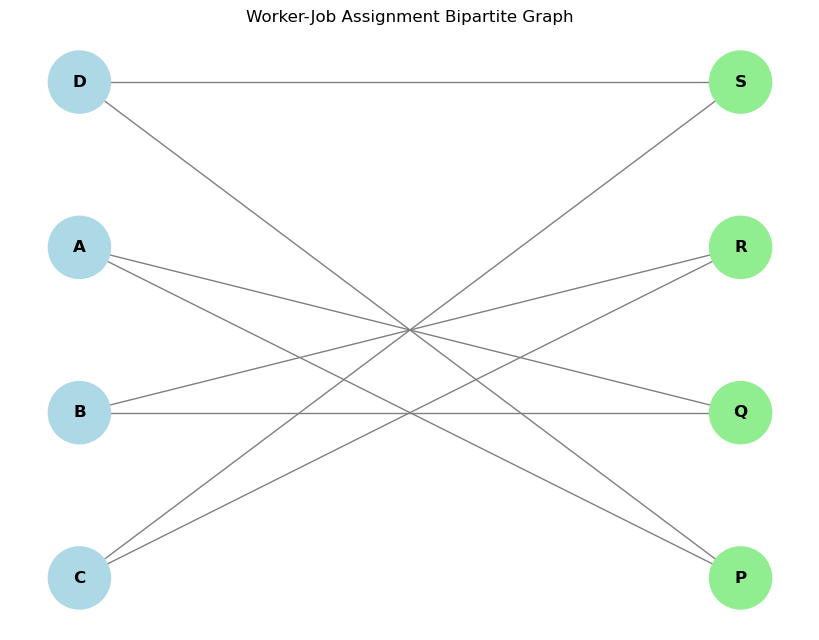

In [12]:
plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=True, node_color=["lightblue" if n in top_nodes else "lightgreen" for n in B.nodes()], 
        edge_color="gray", node_size=2000, font_size=12, font_weight='bold')
plt.title("Worker-Job Assignment Bipartite Graph")
plt.show()


***
### ✅ Solve using Hungarian Method (Linear Sum Assignment)

In [13]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Cost matrix for the assignment problem
cost_matrix = np.array([[5, 6, 7, 6],
                        [4, 3, 2, 3],
                        [2, 3, 5, 2],
                        [5, 5, 2, 8]])

In [14]:
row_ind, col_ind = linear_sum_assignment(cost_matrix)
optimal_assignments = list(zip(row_ind, col_ind))

# Add optimal assignment edges
edges = [(workers[i], jobs[j]) for i, j in optimal_assignments]
B.add_edges_from(edges)

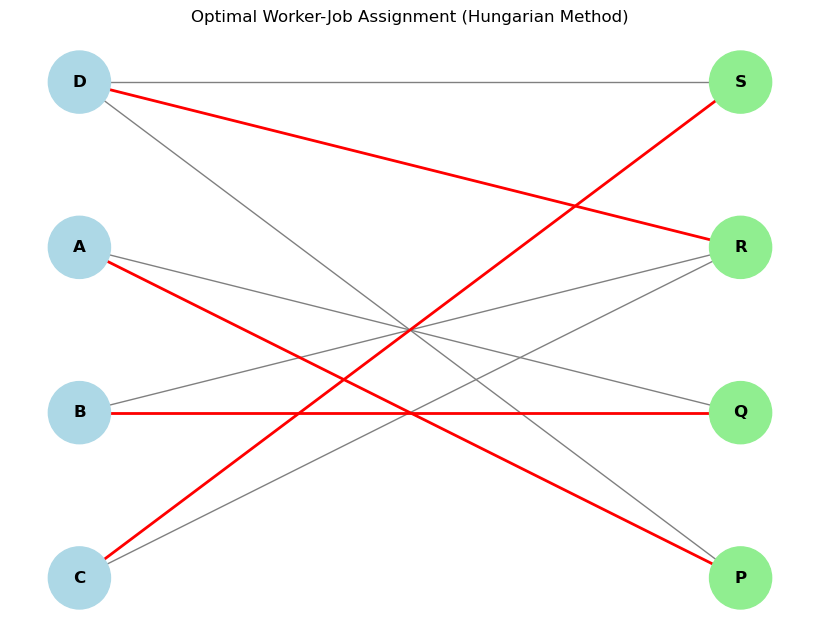

In [15]:
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=True, node_color=["lightblue" if n in top_nodes else "lightgreen" for n in B.nodes()],
        edge_color="gray", node_size=2000, font_size=12, font_weight='bold')
nx.draw_networkx_edges(B, pos, edgelist=edges, edge_color="red", width=2)
plt.title("Optimal Worker-Job Assignment (Hungarian Method)")
plt.show()